In [179]:
print("Sai")

Sai


In [180]:
from scipy.io import arff
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [181]:
df=pd.read_csv("95k-continuous.csv",names=['account_age','no_follower','no_following','no_userfavourites','no_lists','no_tweets','no_retweets','no_hashtag','no_usermentiom','no_urls','no_chars','no_digits','class'])
df

,account_age,no_follower,no_following,no_userfavourites,no_lists,no_tweets,no_retweets,no_hashtag,no_usermentiom,no_urls,no_chars,no_digits,class
0,242,0,0,0,0,62,0,1,0,1,29,0,1
1,834,1,5,0,0,64,0,1,0,1,22,0,1
2,978,44,18,0,0,114,0,1,0,1,35,0,1
3,490,0,26,0,0,3840,0,1,0,1,38,0,1
4,248,0,0,0,0,72,0,1,0,1,42,4,1
5,123,2,611,0,0,319,0,0,0,1,31,0,1
6,303,13840,138,78,13,6352,24,0,1,1,79,1,1
7,206,0,14,0,0,65,0,1,0,1,30,0,1
8,333,0,0,0,0,63,0,1,0,1,26,0,1
9,1277,1,21,5,0,125,0,1,0,1,24,0,1


In [182]:
df.describe()

,account_age,no_follower,no_following,no_userfavourites,no_lists,no_tweets,no_retweets,no_hashtag,no_usermentiom,no_urls,no_chars,no_digits,class
count,100000.000000,1.000000e+05,1.000000e+05,100000.000000,100000.00000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000
mean,728.766140,3.985661e+03,1.130066e+03,885.817880,36.49020,2.309988e+04,117.052280,0.490910,0.380020,1.05183,65.071630,1.457350,0.050000
std,539.999173,6.156881e+04,9.361515e+03,6552.960481,639.78925,5.726457e+04,1592.459468,1.226569,0.697459,0.40108,32.181068,2.846426,0.217946
min,0.000000,-1.000000e+00,-1.000000e+00,-1.000000,0.00000,-1.000000e+00,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000
25%,256.000000,5.900000e+01,7.000000e+01,0.000000,0.00000,1.131000e+03,0.000000,0.000000,0.000000,1.00000,39.000000,0.000000,0.000000
50%,657.500000,2.570000e+02,2.400000e+02,12.000000,1.00000,5.872000e+03,0.000000,0.000000,0.000000,1.00000,64.000000,0.000000,0.000000
75%,1111.000000,8.230000e+02,6.700000e+02,188.000000,5.00000,2.095200e+04,0.000000,1.000000,1.000000,1.00000,92.000000,2.000000,0.000000
max,2696.000000,5.314760e+06,1.561262e+06,507045.000000,78020.00000,2.886206e+06,112088.000000,16.000000,10.000000,6.00000,160.000000,92.000000,1.000000


In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
account_age          100000 non-null int64
no_follower          100000 non-null int64
no_following         100000 non-null int64
no_userfavourites    100000 non-null int64
no_lists             100000 non-null int64
no_tweets            100000 non-null int64
no_retweets          100000 non-null int64
no_hashtag           100000 non-null int64
no_usermentiom       100000 non-null int64
no_urls              100000 non-null int64
no_chars             100000 non-null int64
no_digits            100000 non-null int64
class                100000 non-null int64
dtypes: int64(13)
memory usage: 9.9 MB


In [184]:
df.columns

Index(['account_age', 'no_follower', 'no_following', 'no_userfavourites',
       'no_lists', 'no_tweets', 'no_retweets', 'no_hashtag', 'no_usermentiom',
       'no_urls', 'no_chars', 'no_digits', 'class'],
      dtype='object')

In [185]:
df.groupby('class')['class'].value_counts()

class  class
0      0        95000
1      1         5000
Name: class, dtype: int64

In [186]:
df['class'] = df['class'].astype('category').cat.codes

In [187]:
df.groupby('class')['class'].value_counts()

class  class
0      0        95000
1      1         5000
Name: class, dtype: int64

0 - non-spam

1 - spam

In [188]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix
#from imblearn.under_sampling import RandomUnderSampler

# Fig. 1. Performance degradation caused by class imbalance

In [189]:
fig1 = []

for i in range(2, 21, 2):
#     for every alpha(class imbalance rate), applied random forest for 10 times
    for j in range(10):
        sample = df[df['class'] == 1].sample(1000,replace=True)
    #         took 1000 as base and multiplied by alpha(class imbalance rate)
        sample = sample.append(df[df['class'] == 0].sample(1000*i,replace=True), ignore_index=True)

        X = sample.drop('class',axis=1)
        y = sample['class']

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50)

        rfc = RandomForestClassifier()
        rfc.fit(X_train, y_train)
        rfc_pred = rfc.predict(X_test)

        matrix = confusion_matrix(y_test,rfc_pred)
    #         [TPR, FPR,precision, f-Measure,class imbalance rate]
        fig1.append([matrix[1][1]/float(matrix[1][1] + matrix[1][0]), matrix[0][1]/float(matrix[0][1] + matrix[0][0]),matrix[1][1]/float(matrix[1][1] + matrix[0][1]),2*matrix[1][1]/float(2*matrix[1][1] + matrix[0][1]+matrix[1][0]), i,"Class_Imbalance_Rate"])

In [190]:
fig1 = pd.DataFrame(fig1)
fig1.head()

,0,1,2,3,4,5
0,0.872165,0.024631,0.944196,0.906752,2,Class_Imbalance_Rate
1,0.848249,0.019270,0.958242,0.899897,2,Class_Imbalance_Rate
2,0.875000,0.027237,0.936508,0.904710,2,Class_Imbalance_Rate
3,0.882591,0.027833,0.939655,0.910230,2,Class_Imbalance_Rate
4,0.867446,0.022290,0.952891,0.908163,2,Class_Imbalance_Rate


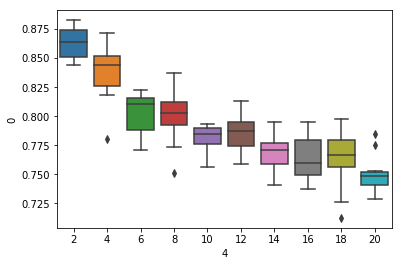

In [191]:
sns.boxplot(fig1[4], fig1[0])

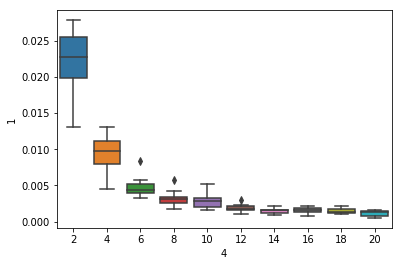

In [192]:
sns.boxplot(fig1[4], fig1[1])

In [193]:
import math
import functools

In [194]:
def ROS(Dplus, alpha):
    return Dplus.append(Dplus.sample(math.ceil(alpha*len(Dplus)), replace=True), ignore_index=True)

In [195]:
len(df)

100000

In [196]:
len(ROS(df, 1.4))

240000

In [197]:
def RUS(Dminus, beta):
    return Dminus.sample(math.ceil((1-beta)*len(Dminus)))

In [198]:
len(RUS(df, 0.8))

20000

In [199]:
import copy
Dplus = df[df['class'] == 1].sample(4000)
deep_Dplus=copy.deepcopy(Dplus)
#deep_dplus.sort_values('no_following',axis=0)
deep_Dplus.mean(axis=0)

account_age           798.72700
no_follower           529.17325
no_following          389.47975
no_userfavourites     202.53825
no_lists                1.72650
no_tweets            6290.87825
no_retweets             7.09950
no_hashtag              0.83175
no_usermentiom          0.04500
no_urls                 1.01475
no_chars               43.08500
no_digits               1.20050
class                   1.00000
dtype: float64

In [200]:
attributes = {1:'account_age',2:'no_follower',3:'no_following',4:'no_userfavourites',5:'no_lists',6:'no_tweets',7:'no_retweets',8:'no_hashtag',9:'no_usermentiom',10:'no_urls',11:'no_chars',12:'no_digits'}

In [201]:
def bin(ar,d,interval_size,s,length):
    if s*interval_size -1 > length:
        width=ar[length-1,d-1]-ar[(s-1)*interval_size,d-1]
        centre = ar[int((length-1 + (s-1)*interval_size)/2)][d-1]
    else:
        width = ar[(s)*interval_size-1,d-1]-ar[(s-1)*interval_size,d-1] 
        centre = ar[int((s*interval_size-1+(s-1)*interval_size-1)/2),d-1]
    
    return centre,width
    

In [202]:
def weight_assign(ar,centre,width,d,length):
    if width==0:
        weights_array=np.ones((length,))
    else:
        a= ar[:,d-1]
        b = abs(a-centre)
        c= b<=width
        b[c]  = 1 - b[c]/width
        d=np.invert(c)
        b[d] = 0
        weights_array = b
    return weights_array

In [203]:
my_list=[]

In [204]:
my_list = [1]

my_list.append(0)
my_list.append(3) 
weights_array = np.array(my_list)
print (weights_array)

[1 0 3]


In [205]:
def get_info(arr):
    return arr.sum()
    

In [206]:
def weighted_mean(arr,ar,t,length):
    arr = np.atleast_2d(arr)
    arr=arr.reshape(length,1)
    b = arr*ar
    c = b.sum(axis=0)
    c[t-1]=1
    return c
    

In [207]:

def FOS(deep_Dplus,Dplus, alpha):
    length=len(deep_Dplus)
    t=int(length*alpha/12)
    interval_size=int(length/t)
    ar = deep_Dplus.as_matrix()
    for d in range(1,13):
        deep_Dplus.sort_values(attributes[d],axis=0)
        for s in range(1,t+1):
            centre,width = bin(ar,d,interval_size,s,length)
            
            
            arr = weight_assign(ar,centre,width,d,length)
            
            if get_info(arr) == 0:
                #Dplus.append(deep_Dplus.mean(axis=0),ignore_index=True)
                df2=pd.DataFrame(np.atleast_2d(deep_Dplus.mean(axis=0)),columns=['account_age','no_follower','no_following','no_userfavourites','no_lists','no_tweets','no_retweets','no_hashtag','no_usermentiom','no_urls','no_chars','no_digits','class'])
                frames=[Dplus,df2]
                Dplus=pd.concat(frames)
            else:
                df2=pd.DataFrame(np.atleast_2d(weighted_mean(arr,ar,13,length)),columns=['account_age','no_follower','no_following','no_userfavourites','no_lists','no_tweets','no_retweets','no_hashtag','no_usermentiom','no_urls','no_chars','no_digits','class'])
#                print ("hie")
                frames=[Dplus,df2]
                Dplus=pd.concat(frames)
#                Dplus.append(df2,ignore_index=True)
    
    return Dplus

In [208]:
df2=pd.DataFrame(np.atleast_2d([0,1,4]),columns=['account_age','no_follower','f'])
df1=pd.DataFrame(np.atleast_2d([2,7,8]),columns=['account_age','no_follower','f'])
df3=pd.DataFrame(np.atleast_2d([3,8,9]),columns=['account_age','no_follower','f'])
frames=[df1,df2]
#result=
df1=pd.concat(frames)
df1

frames=[df1,df1]
df1=pd.concat(frames)
df1
dp = df2.append(df3,ignore_index=True)
dp
df2
#frames=[result,df3]
#result=pd.concat(frames)
#result

,account_age,no_follower,f
0,0,1,4


In [209]:
fig2 = []
i=2
for i in range(2,21,2):
    Target = df['class']

    Train, Test, Target_train, Target_test = train_test_split(df ,Target, test_size=0.50)
    Test_common = Test.drop('class',axis=1)
    for j in range(10):
        #     for every alpha(class imbalance rate), applied random forest for 10 times
        print(str(i)+":")
        print(j)
        #         taking 1k spam and 1k *i non-spam, then ROS is valid for class imbalance rate 20(no need to add samples as 80k/4k = 20)
        dplus = Train[Train['class'] == 1].sample(1000,replace='True') # spam
        dminus = Train[Train['class'] == 0].sample(1000*i,replace='True') # non-spam


        #         Random over sampling
        sample_ROS = dminus.append(ROS(dplus,i-1) , ignore_index=True)
        X_ROS = sample_ROS.drop('class',axis=1)
        y_ROS = sample_ROS['class']

        print(y_ROS.value_counts())

        #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50)


        rfc_ROS = RandomForestClassifier()
        rfc_ROS.fit(X_ROS, y_ROS)
        rfc_ROS_pred = rfc_ROS.predict(Test_common)

        matrix = confusion_matrix(Target_test,rfc_ROS_pred)
        #         [TPR, FPR, precision, class imbalance rate]
        fig2.append([matrix[1][1]/float(matrix[1][1] + matrix[1][0]), matrix[0][1]/float(matrix[0][1] + matrix[0][0]), matrix[1][1]/float(matrix[1][1] + matrix[0][1]),2*matrix[1][1]/float(2*matrix[1][1] + matrix[0][1]+matrix[1][0]),i, "ROS"])


        #         Random under sampling_standalone
        sample_RUS = dplus.append(RUS(dminus,.3) , ignore_index=True)
        X_RUS = sample_RUS.drop('class',axis=1)
        y_RUS = sample_RUS['class']

        print(y_RUS.value_counts())

        #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50)

        rfc_RUS = RandomForestClassifier()
        rfc_RUS.fit(X_RUS, y_RUS)
        rfc_RUS_pred = rfc_RUS.predict(Test_common)

        matrix = confusion_matrix(Target_test,rfc_RUS_pred)
        #         [TPR, FPR, precision, class imbalance rate]
        fig2.append([matrix[1][1]/float(matrix[1][1] + matrix[1][0]), matrix[0][1]/float(matrix[0][1] + matrix[0][0]), matrix[1][1]/float(matrix[1][1] + matrix[0][1]),2*matrix[1][1]/float(2*matrix[1][1] + matrix[0][1]+matrix[1][0]), i, "RUS"])

        #         Random under sampling_ensembler
        sample_RUS = dplus.append(RUS(dminus,1-1/i) , ignore_index=True)
        X_RUS = sample_RUS.drop('class',axis=1)
        y_RUS = sample_RUS['class']

        #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50)

        rfc_RUS = RandomForestClassifier()
        rfc_RUS.fit(X_RUS, y_RUS)
        rfc_RUS_pred = rfc_RUS.predict(Test_common)
        #       Fuzzy based over sampling
        deep_Dplus=copy.deepcopy(dplus)
        sample_FOS = dminus.append(FOS(deep_Dplus,dplus,i-1),ignore_index =True)
        X_FOS = sample_FOS.drop('class',axis=1)
        y_FOS = sample_FOS['class']

        print(y_FOS.value_counts())
       # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50)

        rfc_FOS = RandomForestClassifier()
        rfc_FOS.fit(X_FOS, y_FOS)
        rfc_FOS_pred = rfc_FOS.predict(Test_common)

        matrix = confusion_matrix(Target_test,rfc_FOS_pred)
        #        [TPR, FPR, precision, class imbalance rate]
        fig2.append([matrix[1][1]/float(matrix[1][1] + matrix[1][0]), matrix[0][1]/float(matrix[0][1] + matrix[0][0]), matrix[1][1]/float(matrix[1][1] + matrix[0][1]),2*matrix[1][1]/float(2*matrix[1][1] + matrix[0][1]+matrix[1][0]),i, "FOS"])

        w = np.zeros((len(Test),))

        z = rfc_ROS_pred == 1
        y = rfc_RUS_pred == 1
        x = rfc_FOS_pred == 1
        w[z]= w[z]+1
        w[y]=w[y]+1
        w[x]=w[x]+1
        p = np.invert(z)
        q = np.invert(y)
        r = np.invert(x)
        w[p]= w[p]-1
        w[q]=w[q]-1
        w[r]=w[r]-1

        ensembler_predict = np.zeros((len(Test),))
        u = w>0
        ensembler_predict[u]=1


        matrix = confusion_matrix(Target_test,ensembler_predict)
        fig2.append([matrix[1][1]/float(matrix[1][1] + matrix[1][0]), matrix[0][1]/float(matrix[0][1] + matrix[0][0]), matrix[1][1]/float(matrix[1][1] + matrix[0][1]),2*matrix[1][1]/float(2*matrix[1][1] + matrix[0][1]+matrix[1][0]),i, "ensemble"])

    

2:
0
1    2000
0    2000
Name: class, dtype: int64
0    1400
1    1000
Name: class, dtype: int64
0.0    2000
1.0    1996
Name: class, dtype: int64
2:
1
1    2000
0    2000
Name: class, dtype: int64
0    1400
1    1000
Name: class, dtype: int64
0.0    2000
1.0    1996
Name: class, dtype: int64
2:
2
1    2000
0    2000
Name: class, dtype: int64
0    1400
1    1000
Name: class, dtype: int64
0.0    2000
1.0    1996
Name: class, dtype: int64
2:
3
1    2000
0    2000
Name: class, dtype: int64
0    1400
1    1000
Name: class, dtype: int64
0.0    2000
1.0    1996
Name: class, dtype: int64
2:
4
1    2000
0    2000
Name: class, dtype: int64
0    1400
1    1000
Name: class, dtype: int64
0.0    2000
1.0    1996
Name: class, dtype: int64
2:
5
1    2000
0    2000
Name: class, dtype: int64
0    1400
1    1000
Name: class, dtype: int64
0.0    2000
1.0    1996
Name: class, dtype: int64
2:
6
1    2000
0    2000
Name: class, dtype: int64
0    1400
1    1000
Name: class, dtype: int64
0.0    2000
1.0    19

0    8400
1    1000
Name: class, dtype: int64
0.0    12000
1.0    11992
Name: class, dtype: int64
12:
6
1    12000
0    12000
Name: class, dtype: int64
0    8400
1    1000
Name: class, dtype: int64
0.0    12000
1.0    11992
Name: class, dtype: int64
12:
7
1    12000
0    12000
Name: class, dtype: int64
0    8400
1    1000
Name: class, dtype: int64
0.0    12000
1.0    11992
Name: class, dtype: int64
12:
8
1    12000
0    12000
Name: class, dtype: int64
0    8400
1    1000
Name: class, dtype: int64
0.0    12000
1.0    11992
Name: class, dtype: int64
12:
9
1    12000
0    12000
Name: class, dtype: int64
0    8400
1    1000
Name: class, dtype: int64
0.0    12000
1.0    11992
Name: class, dtype: int64
14:
0
1    14000
0    14000
Name: class, dtype: int64
0    9800
1    1000
Name: class, dtype: int64
0.0    14000
1.0    13996
Name: class, dtype: int64
14:
1
1    14000
0    14000
Name: class, dtype: int64
0    9800
1    1000
Name: class, dtype: int64
0.0    14000
1.0    13996
Name: class, dty

In [210]:
fig3 = pd.DataFrame(fig2)
fig1 = fig1.append(fig3)
fig1

,0,1,2,3,4,5
0,0.872165,0.024631,0.944196,0.906752,2,Class_Imbalance_Rate
1,0.848249,0.019270,0.958242,0.899897,2,Class_Imbalance_Rate
2,0.875000,0.027237,0.936508,0.904710,2,Class_Imbalance_Rate
3,0.882591,0.027833,0.939655,0.910230,2,Class_Imbalance_Rate
4,0.867446,0.022290,0.952891,0.908163,2,Class_Imbalance_Rate
5,0.843750,0.023279,0.949451,0.893485,2,Class_Imbalance_Rate
6,0.852941,0.017172,0.962389,0.904366,2,Class_Imbalance_Rate
7,0.880081,0.025794,0.943355,0.910620,2,Class_Imbalance_Rate
8,0.849802,0.013078,0.970655,0.906217,2,Class_Imbalance_Rate
9,0.860194,0.021320,0.954741,0.905005,2,Class_Imbalance_Rate


Text(0,0.5,'F-Measure')

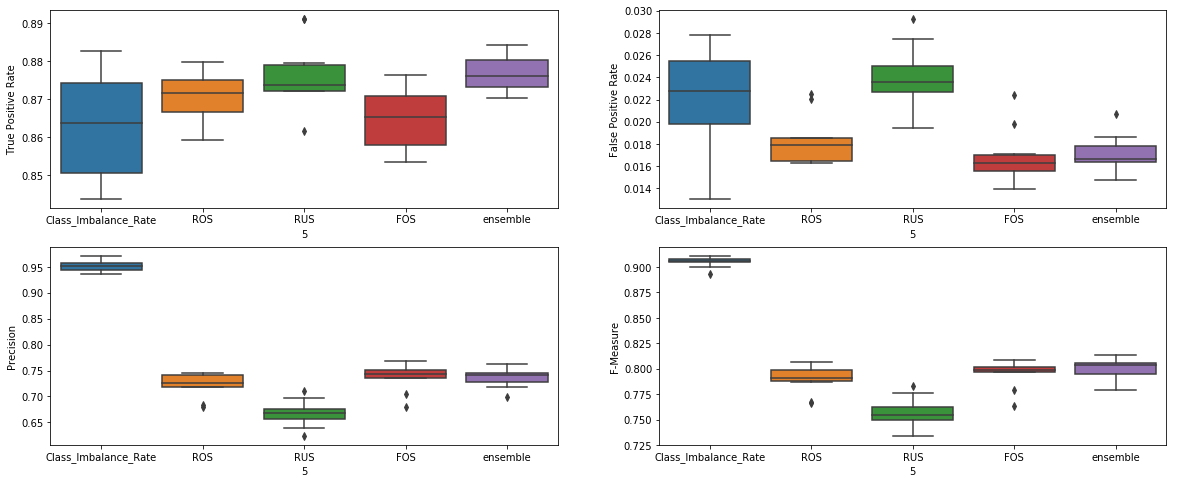

In [211]:
fig, ax = plt.subplots(2,2, figsize=(20,8))
fig = fig1[fig1[4] == 2]
sns.boxplot(fig[5],fig[0],ax=ax[0][0])
ax[0][0].set_ylabel('True Positive Rate')

sns.boxplot(fig[5],fig[1],ax=ax[0][1])
ax[0][1].set_ylabel('False Positive Rate')

a=sns.boxplot(fig[5], fig[2],ax=ax[1][0])
a.set_ylabel('Precision')

a=sns.boxplot(fig[5], fig[3])
a.set_ylabel('F-Measure')
#class-imbalance =2

Text(0,0.5,'F-Measure')

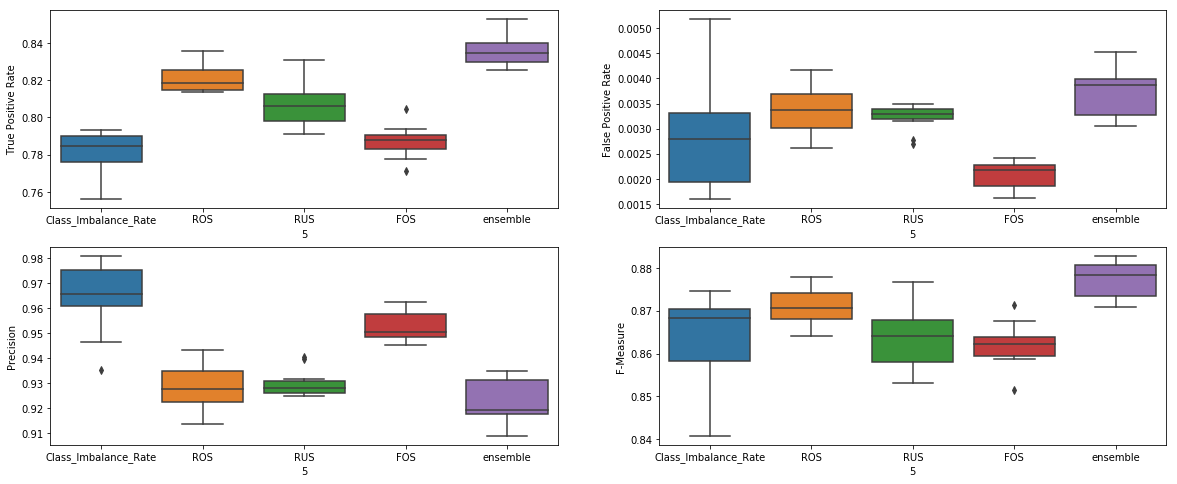

In [212]:
fig, ax = plt.subplots(2,2, figsize=(20,8))
fig = fig1[fig1[4] == 10]
sns.boxplot(fig[5],fig[0],ax=ax[0][0])
ax[0][0].set_ylabel('True Positive Rate')

sns.boxplot(fig[5],fig[1],ax=ax[0][1])
ax[0][1].set_ylabel('False Positive Rate')

a=sns.boxplot(fig[5], fig[2],ax=ax[1][0])
a.set_ylabel('Precision')

a=sns.boxplot(fig[5], fig[3])
a.set_ylabel('F-Measure')

Text(0.5,0,'Class Imbalance Rate')

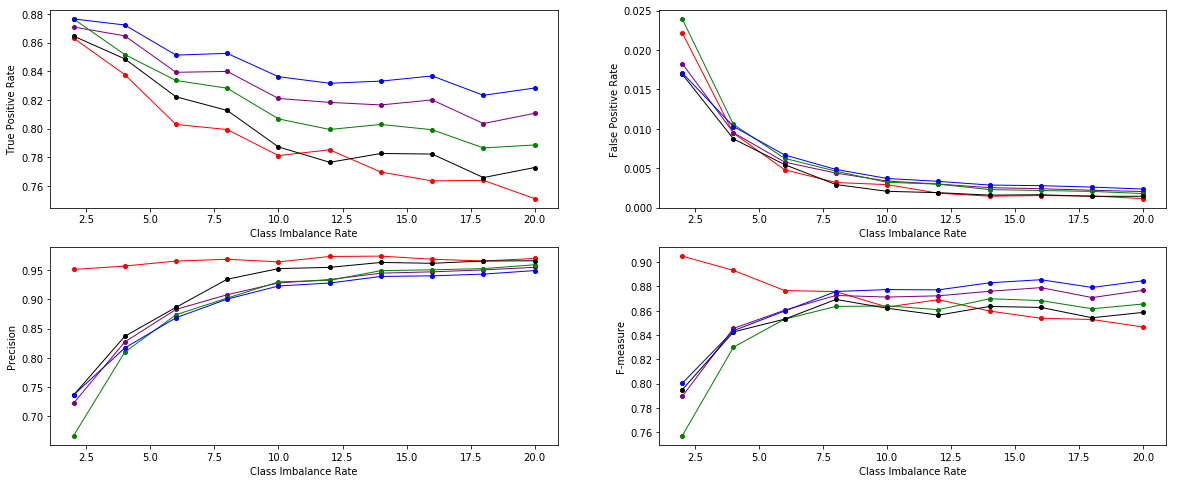

In [213]:
fig, ax = plt.subplots(2,2, figsize=(20,8))

# TPR
fig = fig1[fig1[5] == "Class_Imbalance_Rate"]
fig = fig.groupby(4).mean()
fig[5] = fig.index

ax[0][0].plot(fig[5], fig[0], color="red", lw=1, ls='-', marker='o', markersize=4)

fig = fig1[fig1[5] == "ROS"]
fig = fig.groupby(4).mean()
fig[5] = fig.index

ax[0][0].plot(fig[5], fig[0], color="purple", lw=1, ls='-', marker='o', markersize=4)

fig = fig1[fig1[5] == "RUS"]
fig = fig.groupby(4).mean()
fig[5] = fig.index

ax[0][0].plot(fig[5], fig[0], color="green", lw=1, ls='-', marker='o', markersize=4)

fig = fig1[fig1[5] == "FOS"]
fig = fig.groupby(4).mean()
fig[5] = fig.index

ax[0][0].plot(fig[5], fig[0], color="black", lw=1, ls='-', marker='o', markersize=4)

fig = fig1[fig1[5] == "ensemble"]
fig = fig.groupby(4).mean()
fig[5] = fig.index

ax[0][0].plot(fig[5], fig[0], color="blue", lw=1, ls='-', marker='o', markersize=4)
ax[0][0].set_ylabel('True Positive Rate')
ax[0][0].set_xlabel('Class Imbalance Rate')

# FPR
fig = fig1[fig1[5] == "Class_Imbalance_Rate"]
fig = fig.groupby(4).mean()
fig[5] = fig.index

ax[0][1].plot(fig[5], fig[1], color="red", lw=1, ls='-', marker='o', markersize=4)

fig = fig1[fig1[5] == "ROS"]
fig = fig.groupby(4).mean()
fig[5] = fig.index

ax[0][1].plot(fig[5], fig[1], color="purple", lw=1, ls='-', marker='o', markersize=4)

fig = fig1[fig1[5] == "RUS"]
fig = fig.groupby(4).mean()
fig[5] = fig.index

ax[0][1].plot(fig[5], fig[1], color="green", lw=1, ls='-', marker='o', markersize=4)

fig = fig1[fig1[5] == "FOS"]
fig = fig.groupby(4).mean()
fig[5] = fig.index

ax[0][1].plot(fig[5], fig[1], color="black", lw=1, ls='-', marker='o', markersize=4)

fig = fig1[fig1[5] == "ensemble"]
fig = fig.groupby(4).mean()
fig[5] = fig.index

ax[0][1].plot(fig[5], fig[1], color="blue", lw=1, ls='-', marker='o', markersize=4)
ax[0][1].set_ylabel('False Positive Rate')
ax[0][1].set_xlabel('Class Imbalance Rate')

# Precision
fig = fig1[fig1[5] == "Class_Imbalance_Rate"]
fig = fig.groupby(4).mean()
fig[5] = fig.index

ax[1][0].plot(fig[5], fig[2], color="red", lw=1, ls='-', marker='o', markersize=4)

fig = fig1[fig1[5] == 'ROS']
fig = fig.groupby(4).mean()
fig[5] = fig.index

ax[1][0].plot(fig[5], fig[2], color="purple", lw=1, ls='-', marker='o', markersize=4)

fig = fig1[fig1[5] == 'RUS']
fig = fig.groupby(4).mean()
fig[5] = fig.index

ax[1][0].plot(fig[5], fig[2], color="green", lw=1, ls='-', marker='o', markersize=4)

fig = fig1[fig1[5] == "FOS"]
fig = fig.groupby(4).mean()
fig[5] = fig.index

ax[1][0].plot(fig[5], fig[2], color="black", lw=1, ls='-', marker='o', markersize=4)


fig = fig1[fig1[5] == "ensemble"]
fig = fig.groupby(4).mean()
fig[5] = fig.index

ax[1][0].plot(fig[5], fig[2], color="blue", lw=1, ls='-', marker='o', markersize=4)

ax[1][0].set_ylabel('Precision')
ax[1][0].set_xlabel('Class Imbalance Rate')

#F-measure
fig = fig1[fig1[5] == "Class_Imbalance_Rate"]
fig = fig.groupby(4).mean()
fig[5] = fig.index

ax[1][1].plot(fig[5], fig[3], color="red", lw=1, ls='-', marker='o', markersize=4)

fig = fig1[fig1[5] == 'ROS']
fig = fig.groupby(4).mean()
fig[5] = fig.index

ax[1][1].plot(fig[5], fig[3], color="purple", lw=1, ls='-', marker='o', markersize=4)

fig = fig1[fig1[5] == 'RUS']
fig = fig.groupby(4).mean()
fig[5] = fig.index

ax[1][1].plot(fig[5], fig[3], color="green", lw=1, ls='-', marker='o', markersize=4)

fig = fig1[fig1[5] == "FOS"]
fig = fig.groupby(4).mean()
fig[5] = fig.index

ax[1][1].plot(fig[5], fig[3], color="black", lw=1, ls='-', marker='o', markersize=4)


fig = fig1[fig1[5] == "ensemble"]
fig = fig.groupby(4).mean()
fig[5] = fig.index

ax[1][1].plot(fig[5], fig[3], color="blue", lw=1, ls='-', marker='o', markersize=4)

ax[1][1].set_ylabel('F-measure')
ax[1][1].set_xlabel('Class Imbalance Rate')

red= imbalnced,purple=ROS,green=RUS,black=FOS,blue=ENSEMBLE

THE END